In [1]:
# impor libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

In [2]:
# codes to center the images

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [36]:
# Load data into a pandas DataFrame
fashion_df = pd.read_csv('fashion_tweets_allf.csv')
fashion_df.head()

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text
0,Michelleferg79,NaN,NaN,4981,669,98487,2013-10-25 18:38:52,2020-10-04 17:40:05,174,RT @AnythingGoesL: #Win the 3-Step Anthology f...
1,GillybeansH,NaN,England,4637,238,15409,2009-05-10 13:18:12,2020-10-04 17:40:05,476,RT @So_Lippy: Enter our #October #Competition ...
2,luccaromeo,"Everything has beauty, but not everyone sees i...","Los Angeles, CA",275,179,21939,2015-09-08 17:43:34,2020-10-04 17:40:03,0,Visage de Layla also offers waxing treatment h...
3,FashListings,Sell fashion? List your business for FREE in o...,"Northampton, UK",30747,35104,224859,2014-12-27 15:53:24,2020-10-04 17:40:03,0,Sell #fashion? Submit your website to our #dir...
4,_Fanii10,NaN,NaN,25,36,32,2015-06-21 21:26:09,2020-10-04 17:39:57,1,RT @theregoesjared: Candy Battle 🍬🍭🍫\nStarburs...


In [37]:
# Find out total no of rows and columns
fashion_df.shape

(130000, 10)

In [38]:
# Count missing values
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130000 entries, 0 to 129999
Data columns (total 10 columns):
user_name          130000 non-null object
user_desc          112866 non-null object
location           86636 non-null object
following          130000 non-null int64
followers          130000 non-null int64
totaltweets        130000 non-null int64
user_createdts     130000 non-null object
tweet_createdts    130000 non-null object
retweet_count      130000 non-null int64
text               130000 non-null object
dtypes: int64(4), object(6)
memory usage: 9.9+ MB


In [39]:
# Check for duplicate tweets 

duplicate_tweets_fashion = fashion_df.duplicated(keep='first').sum()
duplicate_tweets_fashion

6596

In [40]:
# drop duplicates
fashion_df = fashion_df.drop_duplicates()
len(fashion_df)

123404

In [41]:
# Check for % of retweets
fashion_df['text'].apply(lambda x: 'RT' in x[:3]).mean()

0.4175796570613594

In [42]:
# Drop the retweets
fashion_df = fashion_df[~fashion_df.text.str.startswith('RT')]
len(fashion_df)

71882

In [43]:
fashion_df.head(5)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text
2,luccaromeo,"Everything has beauty, but not everyone sees i...","Los Angeles, CA",275,179,21939,2015-09-08 17:43:34,2020-10-04 17:40:03,0,Visage de Layla also offers waxing treatment h...
3,FashListings,Sell fashion? List your business for FREE in o...,"Northampton, UK",30747,35104,224859,2014-12-27 15:53:24,2020-10-04 17:40:03,0,Sell #fashion? Submit your website to our #dir...
7,dukebarrett,Baltimore based photographer. Ready to make yo...,"Parkville, MD",136,257,8859,2009-07-14 03:15:32,2020-10-04 17:39:36,0,#model #fashion #texture #baltimorephotographe...
9,Panty_Buns,Love to male-model/review full brief panties+f...,"Long Island, NY",1295,1276,63481,2011-09-09 01:22:26,2020-10-04 17:39:32,0,'Fall 2020 Fashion Trend' - #Fbloggers 5 #OOTD...
11,MartaFerrazAtom,"Futurist Scientist, Polymath\nAugmented Humans...",Netherlands,483,37,11,2010-03-30 20:21:44,2020-10-04 17:39:29,0,Design for the Future When the Future Is Bleak...


In [44]:
# defind a function to find all the hashtags in a tweet

def hashtag(text):
    return (set([str(i.lower()) for i in text.split() if i.startswith("#")]))

fashion_df['hashtags'] = fashion_df['text'].apply(hashtag)
fashion_df.head(3)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags
2,luccaromeo,"Everything has beauty, but not everyone sees i...","Los Angeles, CA",275,179,21939,2015-09-08 17:43:34,2020-10-04 17:40:03,0,Visage de Layla also offers waxing treatment h...,{#beauty}
3,FashListings,Sell fashion? List your business for FREE in o...,"Northampton, UK",30747,35104,224859,2014-12-27 15:53:24,2020-10-04 17:40:03,0,Sell #fashion? Submit your website to our #dir...,"{#bizitalk, #seo, #fashion?, #fnzb, #directory}"
7,dukebarrett,Baltimore based photographer. Ready to make yo...,"Parkville, MD",136,257,8859,2009-07-14 03:15:32,2020-10-04 17:39:36,0,#model #fashion #texture #baltimorephotographe...,"{#fashion, #texture, #paulcbuff, #newcommer, #..."


In [45]:
# Count the hashtags per each tweets
fashion_df['num_hashtags'] = fashion_df['hashtags'].apply(len)
fashion_df.head(3)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags
2,luccaromeo,"Everything has beauty, but not everyone sees i...","Los Angeles, CA",275,179,21939,2015-09-08 17:43:34,2020-10-04 17:40:03,0,Visage de Layla also offers waxing treatment h...,{#beauty},1
3,FashListings,Sell fashion? List your business for FREE in o...,"Northampton, UK",30747,35104,224859,2014-12-27 15:53:24,2020-10-04 17:40:03,0,Sell #fashion? Submit your website to our #dir...,"{#bizitalk, #seo, #fashion?, #fnzb, #directory}",5
7,dukebarrett,Baltimore based photographer. Ready to make yo...,"Parkville, MD",136,257,8859,2009-07-14 03:15:32,2020-10-04 17:39:36,0,#model #fashion #texture #baltimorephotographe...,"{#fashion, #texture, #paulcbuff, #newcommer, #...",15


In [46]:
# find the number of search hashtags (we used thsese tags to pull the tweet) in a tweet
search_tags = ['#fashion', '#style',  '#design',  '#beauty',  '#fashiontrends',  '#fashionblogger', '#fashionstyle',  '#fashionweek',  '#fashionstylist',  '#fashionmodel' , '#fasionista' , '#model',  '#fashionlover',  '#womenfashion', '#menfashion']

def search_hashtags(tags):
    t = 0
    for i in search_tags:
        for j in tags:
            if i in j:
                t += 1
    return t

                
fashion_df['num_search_tags'] = fashion_df['hashtags'].apply(search_hashtags)
fashion_df.head()            

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags
2,luccaromeo,"Everything has beauty, but not everyone sees i...","Los Angeles, CA",275,179,21939,2015-09-08 17:43:34,2020-10-04 17:40:03,0,Visage de Layla also offers waxing treatment h...,{#beauty},1,1
3,FashListings,Sell fashion? List your business for FREE in o...,"Northampton, UK",30747,35104,224859,2014-12-27 15:53:24,2020-10-04 17:40:03,0,Sell #fashion? Submit your website to our #dir...,"{#bizitalk, #seo, #fashion?, #fnzb, #directory}",5,1
7,dukebarrett,Baltimore based photographer. Ready to make yo...,"Parkville, MD",136,257,8859,2009-07-14 03:15:32,2020-10-04 17:39:36,0,#model #fashion #texture #baltimorephotographe...,"{#fashion, #texture, #paulcbuff, #newcommer, #...",15,3
9,Panty_Buns,Love to male-model/review full brief panties+f...,"Long Island, NY",1295,1276,63481,2011-09-09 01:22:26,2020-10-04 17:39:32,0,'Fall 2020 Fashion Trend' - #Fbloggers 5 #OOTD...,"{#fashion, #outfit, #lookbook, #style, #fblogg...",6,2
11,MartaFerrazAtom,"Futurist Scientist, Polymath\nAugmented Humans...",Netherlands,483,37,11,2010-03-30 20:21:44,2020-10-04 17:39:29,0,Design for the Future When the Future Is Bleak...,"{#environment, #fiction, #design}",3,1


In [47]:
# find the the number of tweets with no search hashtags
len(fashion_df[fashion_df.num_search_tags == 0])

105

In [48]:
# drop the tweets with no search hashtags

fashion_df = fashion_df[fashion_df.num_search_tags != 0]
len(fashion_df)


71777

In [49]:
# Remove tweets between 5000 and 30,000 followers
fashion_df = fashion_df[(fashion_df.followers <= 5000) | (fashion_df.followers > 30000)]
len(fashion_df)

66445

In [50]:
def label_func(followers):
    if followers > 30000:
        return 1
    else:
        return 0
fashion_df['label'] = fashion_df['followers'].apply(label_func)
fashion_df.head()

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label
2,luccaromeo,"Everything has beauty, but not everyone sees i...","Los Angeles, CA",275,179,21939,2015-09-08 17:43:34,2020-10-04 17:40:03,0,Visage de Layla also offers waxing treatment h...,{#beauty},1,1,0
3,FashListings,Sell fashion? List your business for FREE in o...,"Northampton, UK",30747,35104,224859,2014-12-27 15:53:24,2020-10-04 17:40:03,0,Sell #fashion? Submit your website to our #dir...,"{#bizitalk, #seo, #fashion?, #fnzb, #directory}",5,1,1
7,dukebarrett,Baltimore based photographer. Ready to make yo...,"Parkville, MD",136,257,8859,2009-07-14 03:15:32,2020-10-04 17:39:36,0,#model #fashion #texture #baltimorephotographe...,"{#fashion, #texture, #paulcbuff, #newcommer, #...",15,3,0
9,Panty_Buns,Love to male-model/review full brief panties+f...,"Long Island, NY",1295,1276,63481,2011-09-09 01:22:26,2020-10-04 17:39:32,0,'Fall 2020 Fashion Trend' - #Fbloggers 5 #OOTD...,"{#fashion, #outfit, #lookbook, #style, #fblogg...",6,2,0
11,MartaFerrazAtom,"Futurist Scientist, Polymath\nAugmented Humans...",Netherlands,483,37,11,2010-03-30 20:21:44,2020-10-04 17:39:29,0,Design for the Future When the Future Is Bleak...,"{#environment, #fiction, #design}",3,1,0


In [51]:
followers_count = fashion_df['label'].value_counts().sort_index()
followers_count

0    65192
1     1253
Name: label, dtype: int64

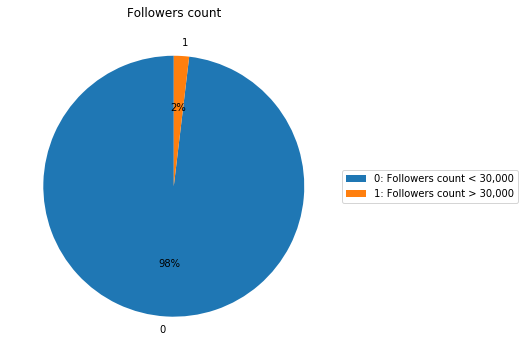

In [52]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
plt.pie(followers_count, labels=[0,1],startangle=90, autopct='%.0f%%')

ax.legend(["0: Followers count < 30,000", "1: Followers count > 30,000"], loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Followers count")

plt.show()

### Distribution of Word Count, % of caps, number of hashtags in different labels (followers count category)

In [53]:
# Distribution of tweet length in different labels (followers category)

fashion_df['tweet_length'] = fashion_df['text'].apply(lambda x: len(x.split())) # tweet length
fashion_df.head(2)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label,tweet_length
2,luccaromeo,"Everything has beauty, but not everyone sees i...","Los Angeles, CA",275,179,21939,2015-09-08 17:43:34,2020-10-04 17:40:03,0,Visage de Layla also offers waxing treatment h...,{#beauty},1,1,0,9
3,FashListings,Sell fashion? List your business for FREE in o...,"Northampton, UK",30747,35104,224859,2014-12-27 15:53:24,2020-10-04 17:40:03,0,Sell #fashion? Submit your website to our #dir...,"{#bizitalk, #seo, #fashion?, #fnzb, #directory}",5,1,1,13


In [54]:
# user with higest number of tweets on fashion
user = fashion_df['user_name'].value_counts()
user.head(10)

Kada_soulayman     328
FitCasuallyMODA    259
DLentilse          240
FitCasuallySKIN    221
PrettyGemsLoved    157
insoc_on_ebay      136
HannahB74560504    127
GraphicsTania      117
AusFashionEx       114
SkincareNetAu      108
Name: user_name, dtype: int64

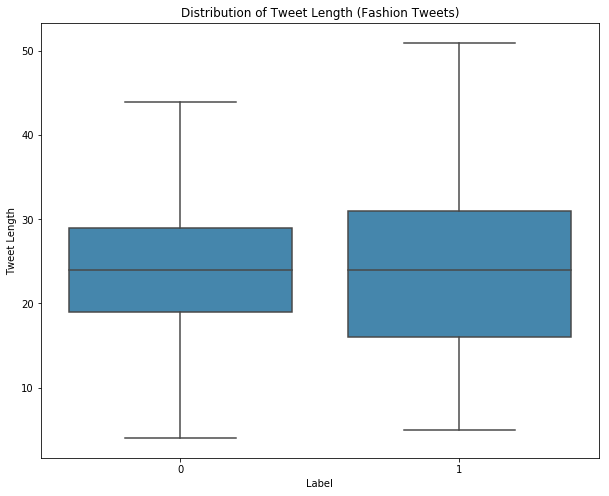

In [220]:
# tweet length distribution at different labels
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = 'tweet_length', data = fashion_df, showfliers=False,color='#348ABD').set(xlabel= 'Label', ylabel='Tweet Length', title='Distribution of Tweet Length (Fashion Tweets)')
plt.show()

In [59]:
# define a function to get % of caps in a tweet
def caps(text):
    return np.mean([1 if i.isupper() else 0 for i in text]) * 100 # % caps per tweet

fashion_df['% caps'] = fashion_df['text'].apply(caps)
fashion_df.head(2)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label,tweet_length,% caps
2,luccaromeo,"Everything has beauty, but not everyone sees i...","Los Angeles, CA",275,179,21939,2015-09-08 17:43:34,2020-10-04 17:40:03,0,Visage de Layla also offers waxing treatment h...,{#beauty},1,1,0,9,7.894737
3,FashListings,Sell fashion? List your business for FREE in o...,"Northampton, UK",30747,35104,224859,2014-12-27 15:53:24,2020-10-04 17:40:03,0,Sell #fashion? Submit your website to our #dir...,"{#bizitalk, #seo, #fashion?, #fnzb, #directory}",5,1,1,13,12.264151


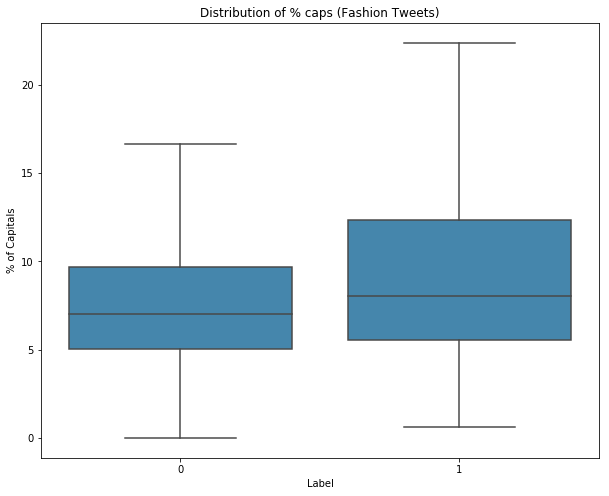

In [218]:
# Distribution of % of Caps in different followers count (labels)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fashion_df['% caps'], data = fashion_df, showfliers=False, color='#348ABD').set(xlabel= 'Label',ylabel='% of Capitals', title='Distribution of % caps (Fashion Tweets)')
plt.show()

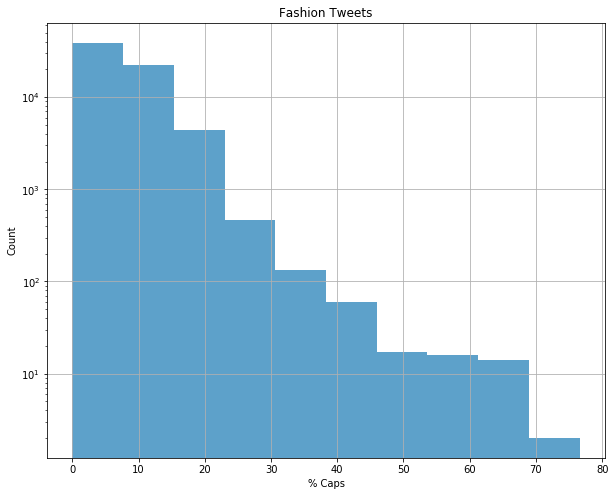

In [228]:
# Distribution of % caps
plt.figure(figsize=(10, 8))

fashion_df['% caps'].hist(color='#348ABD', alpha=0.8)
plt.yscale('log', nonposy='clip')
plt.title('Fashion Tweets')
plt.xlabel('% Caps')
plt.ylabel('Count');

In [26]:
fashion_df[(fashion_df['text'].apply(caps) > 30) & (fashion_df['followers'].apply(lambda x: x >30000))].text

1741     OH HI THERE! VERY FIRST SHINY SMOOCHUM!!! ✨✨✨ ...
63590    IM A MODEL!!! U KNW WHAT I MEAN! EITHER U GOT ...
67714    Check out DIESEL JEANS ZANITY 822R BOOTCUT BUT...
89869    【別注】GRAMICCI×URBAN RESEARCH　WASHABLE WOOLLY PA...
Name: text, dtype: object

In [219]:
fashion_df[['label', '% caps']].groupby('label').mean()

,% caps
label,
0,7.995563
1,9.022750


In [64]:
# Distributions of % caps (> 20%) in different labels

fashion_df['manycaps'] = fashion_df['% caps'].apply(lambda x: x > 20)
fashion_df.head(2)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label,tweet_length,% caps,manycaps
2,luccaromeo,"Everything has beauty, but not everyone sees i...","Los Angeles, CA",275,179,21939,2015-09-08 17:43:34,2020-10-04 17:40:03,0,Visage de Layla also offers waxing treatment h...,{#beauty},1,1,0,9,7.894737,False
3,FashListings,Sell fashion? List your business for FREE in o...,"Northampton, UK",30747,35104,224859,2014-12-27 15:53:24,2020-10-04 17:40:03,0,Sell #fashion? Submit your website to our #dir...,"{#bizitalk, #seo, #fashion?, #fnzb, #directory}",5,1,1,13,12.264151,False


In [70]:
manycaps_fashion = fashion_df[['label', 'manycaps']].groupby('label').mean()
manycaps_fashion

,manycaps
label,
0,0.019389
1,0.014366


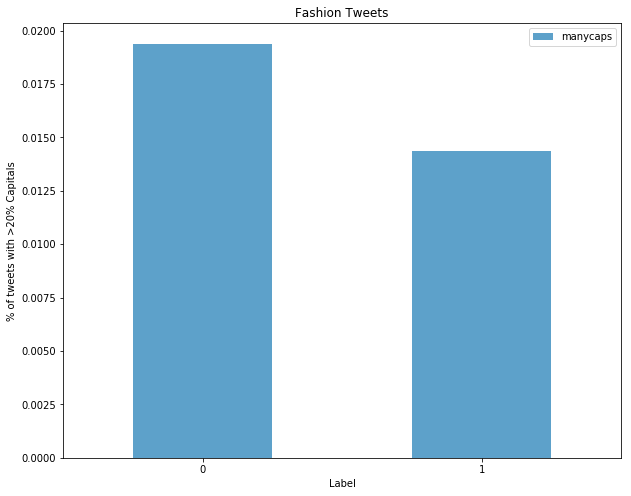

In [214]:
manycaps_fashion.plot(kind='bar', color='#348ABD',rot = 0, alpha=0.8, figsize=(10,8)).set(xlabel='Label', ylabel='% of tweets with >20% Capitals', title='Fashion Tweets');


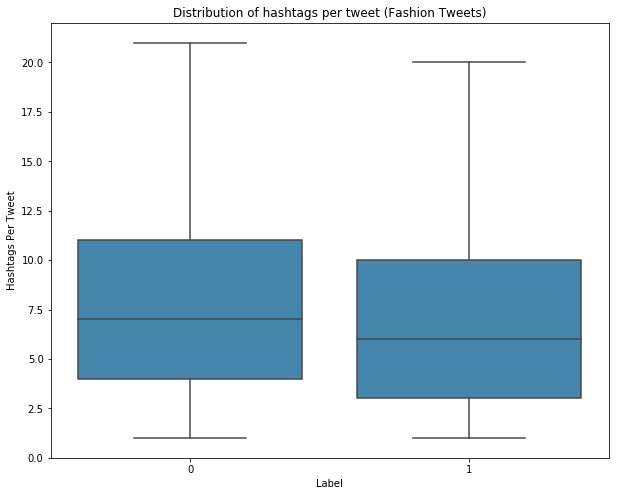

In [215]:
# Distribution of number of hashtags in different labels
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = 'num_hashtags', data = fashion_df, showfliers=False,color='#348ABD' ).set(xlabel= 'Label',ylabel='Hashtags Per Tweet', title='Distribution of hashtags per tweet (Fashion Tweets)')
plt.show()

In [216]:
# import textstat library and set it for English language to study the reading level of the tweets
import textstat
textstat.set_lang('en')


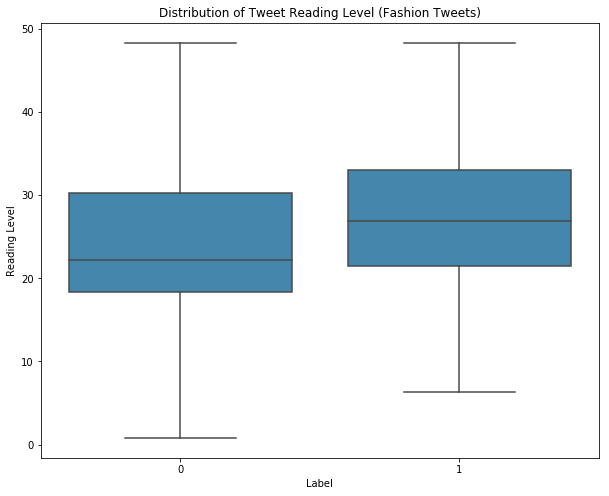

In [221]:
# Distribution of reading level in different labels (Automated Readability Index)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fashion_df['text'].apply(lambda x: textstat.automated_readability_index(x)), data = fashion_df, showfliers=False, color='#348ABD').set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fashion Tweets)')
plt.show()

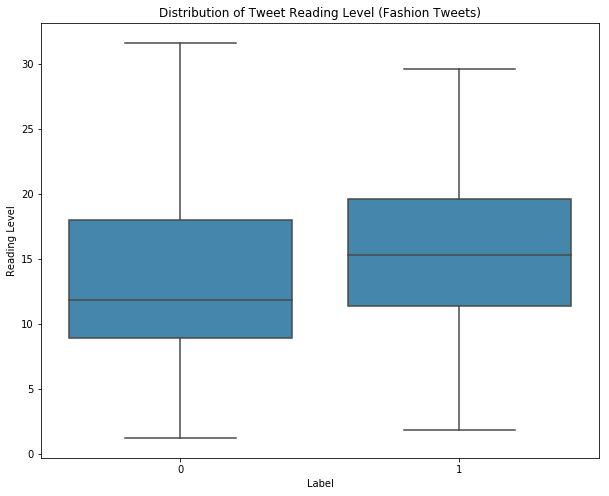

In [222]:
# Distribution of reading level in different labels (Fog Scale)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fashion_df['text'].apply(lambda x: textstat.gunning_fog(x)), data = fashion_df, showfliers=False, color='#348ABD').set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fashion Tweets)')
plt.show()

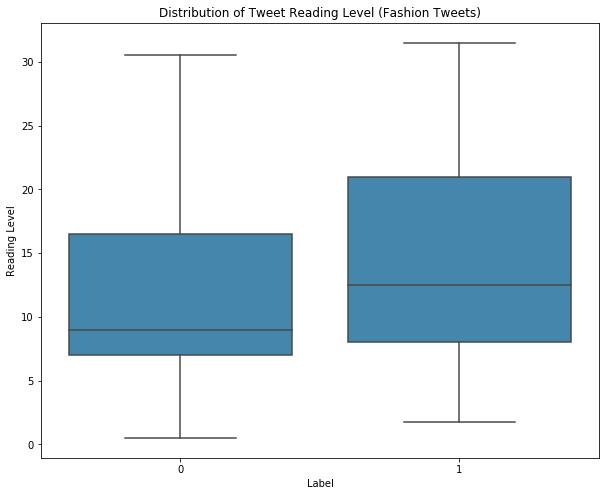

In [223]:
# Distribution of reading level in different labels (Linsear Write Formula)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fashion_df['text'].apply(lambda x: textstat.linsear_write_formula(x)), data = fashion_df, showfliers=False, color='#348ABD').set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fashion Tweets)')
plt.show()

## Preprocessing of tweet

- Remove URLs
- Remove Mentions
- Remove Punctuations, numbers and special characters
- Tokenization
- Remove Stopwords


In [134]:
# import NLP packages
import re
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Preprocessed text (without lemmatization) before the findinding the most predictive words
def text_preprocessing(text):
    text = re.sub(r'http\S+', '', text)   # removing URL
    text = re.sub(r'@(\w+)','',text, flags = re.MULTILINE) # remove mentions
    text = re.sub('[^a-zA-Z#]', ' ', text) # keep only alpha (removing numbers, punctions and special characters)
    text = str(text).lower()              # Lowercase all text
    text = [w for w in text.split() if w not in stop_words] # Removing Stopwords
    text = ' '.join(text)
    return text

fashion_df["clean_tweet"] = fashion_df['text'].apply(text_preprocessing)
fashion_df.head(2)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label,tweet_length,% caps,manycaps,clean_tweet
2,luccaromeo,"Everything has beauty, but not everyone sees i...","Los Angeles, CA",275,179,21939,2015-09-08 17:43:34,2020-10-04 17:40:03,0,Visage de Layla also offers waxing treatment h...,{#beauty},1,1,0,9,7.894737,False,visage de layla also offers waxing treatment #...
3,FashListings,Sell fashion? List your business for FREE in o...,"Northampton, UK",30747,35104,224859,2014-12-27 15:53:24,2020-10-04 17:40:03,0,Sell #fashion? Submit your website to our #dir...,"{#bizitalk, #seo, #fashion?, #fnzb, #directory}",5,1,1,13,12.264151,False,sell #fashion submit website #directory gt gt ...


In [135]:
# make a pickled file to store the preprocessed tweets
pd.to_pickle(fashion_df, 'fashion_preprocessed.pkl')

## Fitness Tweets

In [90]:
# Load fitness tweets into a pandas DataFrame
fitness_df = pd.read_csv('fitness_tweets.csv')
fitness_df.head()

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text
0,anusualauthor,official tweet of Enigma Anu Aggarwal,"Mumbai, India",544,3743,2661,2010-04-30 12:38:54,2020-10-05 15:34:17,0,You get to know your #true #nature in that mom...
1,WhtIStheSCIENCE,Clinical Director #BCBA for @SpecialNeedsLA #A...,"Los Angeles, CA",1008,696,7214,2012-10-15 06:38:35,2020-10-05 15:34:07,1,RT @SpectrumSports8: Cone Flip Melee!! \n\n#do...
2,HeathAJordan,Entrepreneur/ Filmmaker/ CEO/ Producer/ Direct...,Sarasota Florida,6775,8567,50578,2011-06-21 22:56:28,2020-10-05 15:34:03,0,#RT @lucaslagoons: RT @LagoonsDesign: Want to ...
3,CeciliaMaundu,"Broadcast journalist, Specialist in Gender Dig...",Nairobi,888,754,7282,2012-01-11 04:09:14,2020-10-05 15:34:00,4,RT @PollicyOrg: Register for our next hands-on...
4,LidiaSegundoCar,NaN,NaN,722,772,591,2019-04-09 00:48:01,2020-10-05 15:33:54,1,RT @petertamayo: Nada #cambia si tu no cambias...


In [91]:
# Find out total no of rows and columns
fitness_df.shape

(95776, 10)

In [92]:
# Count missing values
fitness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95776 entries, 0 to 95775
Data columns (total 10 columns):
user_name          95776 non-null object
user_desc          86638 non-null object
location           68689 non-null object
following          95776 non-null int64
followers          95776 non-null int64
totaltweets        95776 non-null int64
user_createdts     95776 non-null object
tweet_createdts    95776 non-null object
retweet_count      95776 non-null int64
text               95776 non-null object
dtypes: int64(4), object(6)
memory usage: 7.3+ MB


In [93]:
# Check for duplicate tweets 
duplicate_tweets_fitness = fitness_df.duplicated(keep='first').sum()
duplicate_tweets_fitness

18596

In [94]:
# drop duplicates
fitness_df = fitness_df.drop_duplicates()
len(fitness_df)

77180

In [95]:
# Check for % of retweets
fitness_df['text'].apply(lambda x: 'RT' in x[:3]).mean()

0.40186576833376525

In [96]:
# Drop the retweets
fitness_df = fitness_df[~fitness_df.text.str.startswith('RT')]
len(fitness_df)

46186

In [97]:
# defind a function to find all the hashtags in a tweet

def hashtag(text):
    return (set([str(i.lower()) for i in text.split() if i.startswith("#")]))

fitness_df['hashtags'] = fitness_df['text'].apply(hashtag)
fitness_df.head(3)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags
0,anusualauthor,official tweet of Enigma Anu Aggarwal,"Mumbai, India",544,3743,2661,2010-04-30 12:38:54,2020-10-05 15:34:17,0,You get to know your #true #nature in that mom...,"{#anuaggarwalfoundation, #mentalhealth, #bloom..."
2,HeathAJordan,Entrepreneur/ Filmmaker/ CEO/ Producer/ Direct...,Sarasota Florida,6775,8567,50578,2011-06-21 22:56:28,2020-10-05 15:34:03,0,#RT @lucaslagoons: RT @LagoonsDesign: Want to ...,"{#workout, #insanepools, #lucaslagoons, #rt}"
7,IHealthtou,Welcome to I Health 2 U store!,United States,1,45,3205,2019-12-15 18:16:24,2020-10-05 15:33:33,0,13.58I Health 2 U#inspiration #wellness 310 ml...,{#wellness}


In [98]:
# Count the hashtags per each tweets
fitness_df['num_hashtags'] = fitness_df['hashtags'].apply(len)
fitness_df.head(3)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags
0,anusualauthor,official tweet of Enigma Anu Aggarwal,"Mumbai, India",544,3743,2661,2010-04-30 12:38:54,2020-10-05 15:34:17,0,You get to know your #true #nature in that mom...,"{#anuaggarwalfoundation, #mentalhealth, #bloom...",15
2,HeathAJordan,Entrepreneur/ Filmmaker/ CEO/ Producer/ Direct...,Sarasota Florida,6775,8567,50578,2011-06-21 22:56:28,2020-10-05 15:34:03,0,#RT @lucaslagoons: RT @LagoonsDesign: Want to ...,"{#workout, #insanepools, #lucaslagoons, #rt}",4
7,IHealthtou,Welcome to I Health 2 U store!,United States,1,45,3205,2019-12-15 18:16:24,2020-10-05 15:33:33,0,13.58I Health 2 U#inspiration #wellness 310 ml...,{#wellness},1


In [99]:
# find the number of search hashtags (we used thsese tags to pull the tweet) in a tweet
fit_search_tags = ['#fitness', '#workout', '#gym', '#healthy', '#fitnessmotivation', '#fitnessmodel', '#healthylifestyle', '#fit', '#mtivation', '#wellness', '#lifestyle', '#mindbody', '#training', '#exercise', '#exercise', '#firnesslife', '#healthandfitness', '#exercisemotivation']


def search_hashtags(tags):
    t = 0
    for i in fit_search_tags:
        for j in tags:
            if i in j:
                t += 1
    return t

                
fitness_df['num_search_tags'] = fitness_df['hashtags'].apply(search_hashtags)
fitness_df.head()            

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags
0,anusualauthor,official tweet of Enigma Anu Aggarwal,"Mumbai, India",544,3743,2661,2010-04-30 12:38:54,2020-10-05 15:34:17,0,You get to know your #true #nature in that mom...,"{#anuaggarwalfoundation, #mentalhealth, #bloom...",15,1
2,HeathAJordan,Entrepreneur/ Filmmaker/ CEO/ Producer/ Direct...,Sarasota Florida,6775,8567,50578,2011-06-21 22:56:28,2020-10-05 15:34:03,0,#RT @lucaslagoons: RT @LagoonsDesign: Want to ...,"{#workout, #insanepools, #lucaslagoons, #rt}",4,1
7,IHealthtou,Welcome to I Health 2 U store!,United States,1,45,3205,2019-12-15 18:16:24,2020-10-05 15:33:33,0,13.58I Health 2 U#inspiration #wellness 310 ml...,{#wellness},1,1
9,KavitaRaoMD,Dr. Kavita Rao M.D. is a Gulf Coast internist ...,"St. Petersburg, FL",40,5,673,2014-12-19 18:06:56,2020-10-05 15:33:30,0,Love yourself enough to live a healthy lifesty...,"{#health, #wellness, #healthyliving}",3,2
11,Crystal_Price13,Just me - all day - everyday,"Panama City, FL",60,445,12936,2013-05-21 23:46:02,2020-10-05 15:33:25,0,I thought you might enjoy a 5 minute break wit...,"{#mylifemindfully, #healthylifestyle, #meditat...",6,4


In [100]:
# find the the number of tweets with no search hashtags
len(fitness_df[fitness_df.num_search_tags == 0])

111

In [101]:
# drop the tweets with no search hashtags
fitness_df = fitness_df[fitness_df.num_search_tags != 0]
len(fitness_df)

46075

In [103]:
# Remove tweets between 5000 and 30,000 followers
fitness_df = fitness_df[(fitness_df.followers <= 5000) | (fitness_df.followers > 30000)]
len(fitness_df)

41504

In [105]:
# define a function to label the tweets based on the number of followers the user have
def label_func(followers):
    if followers > 30000:
        return 1
    else:
        return 0
fitness_df['label'] = fitness_df['followers'].apply(label_func)
fitness_df.head(2)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label
0,anusualauthor,official tweet of Enigma Anu Aggarwal,"Mumbai, India",544,3743,2661,2010-04-30 12:38:54,2020-10-05 15:34:17,0,You get to know your #true #nature in that mom...,"{#anuaggarwalfoundation, #mentalhealth, #bloom...",15,1,0
7,IHealthtou,Welcome to I Health 2 U store!,United States,1,45,3205,2019-12-15 18:16:24,2020-10-05 15:33:33,0,13.58I Health 2 U#inspiration #wellness 310 ml...,{#wellness},1,1,0


In [106]:
# counts the number of tweets in each label
followers_count_fit = fitness_df['label'].value_counts().sort_index()
followers_count_fit

0    39958
1     1546
Name: label, dtype: int64

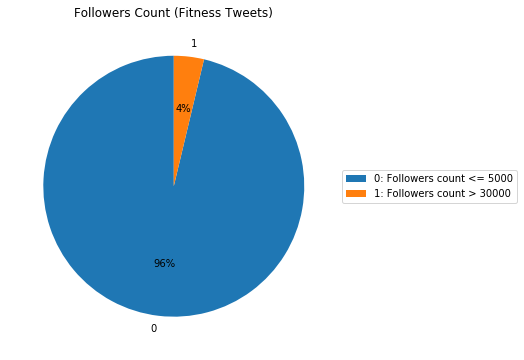

In [107]:
# Pie plot to show the percentage of tweets in each label
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
plt.pie(followers_count_fit, labels=[0,1],startangle=90, autopct='%.0f%%')

ax.legend(["0: Followers count <= 5000", "1: Followers count > 30000"], loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Followers Count (Fitness Tweets)")

plt.show()

### Distribution of Word Count, % of caps, number of hashtags in different labels (followers count category)

In [108]:
# Distribution of tweet length in different labels (followers category)

fitness_df['tweet_length'] = fitness_df['text'].apply(lambda x: len(x.split())) # tweet length
fitness_df.head(2)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label,tweet_length
0,anusualauthor,official tweet of Enigma Anu Aggarwal,"Mumbai, India",544,3743,2661,2010-04-30 12:38:54,2020-10-05 15:34:17,0,You get to know your #true #nature in that mom...,"{#anuaggarwalfoundation, #mentalhealth, #bloom...",15,1,0,36
7,IHealthtou,Welcome to I Health 2 U store!,United States,1,45,3205,2019-12-15 18:16:24,2020-10-05 15:33:33,0,13.58I Health 2 U#inspiration #wellness 310 ml...,{#wellness},1,1,0,15


In [109]:
# user with higest number of tweets on fashion
user_fit = fitness_df['user_name'].value_counts()
user_fit.head(10)

TheMysticMist      292
StanleyEpstein     149
EarthWizardInfo    126
buzbuzhd           112
DatinginAus         95
DatingAceUSA        91
VanessaCarters      88
XFitnessWelland     84
discoveryvip        78
BcabaNetwork        73
Name: user_name, dtype: int64

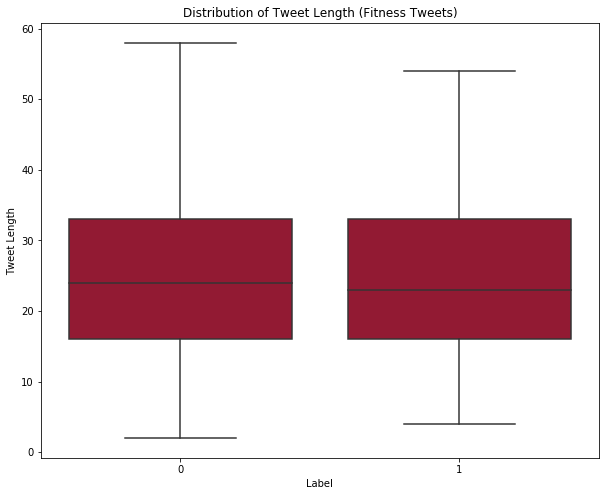

In [213]:
# tweet length distribution at different labels
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = 'tweet_length', data = fitness_df, showfliers=False, color='#A60628').set(xlabel= 'Label', ylabel='Tweet Length', title='Distribution of Tweet Length (Fitness Tweets)')
plt.show()

In [116]:
# define a function to get % of caps in a tweet
def caps(text):
    return np.mean([1 if i.isupper() else 0 for i in text]) * 100

fitness_df['% caps'] = fitness_df['text'].apply(caps)
fitness_df.head(2)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label,tweet_length,% caps
0,anusualauthor,official tweet of Enigma Anu Aggarwal,"Mumbai, India",544,3743,2661,2010-04-30 12:38:54,2020-10-05 15:34:17,0,You get to know your #true #nature in that mom...,"{#anuaggarwalfoundation, #mentalhealth, #bloom...",15,1,0,36,2.105263
7,IHealthtou,Welcome to I Health 2 U store!,United States,1,45,3205,2019-12-15 18:16:24,2020-10-05 15:33:33,0,13.58I Health 2 U#inspiration #wellness 310 ml...,{#wellness},1,1,0,15,11.111111


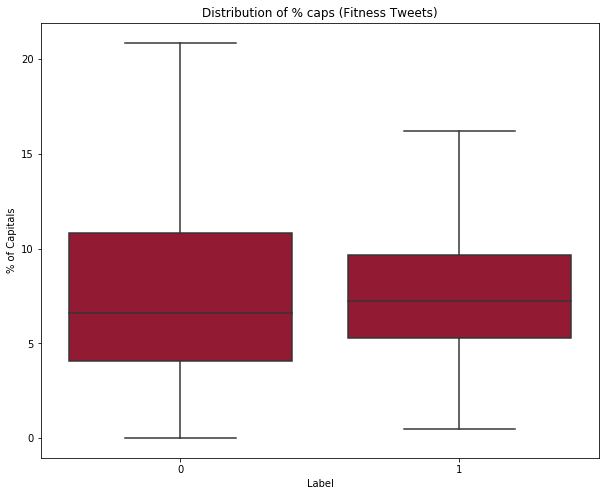

In [212]:
# Distribution of % of Caps in different followers count (labels)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fitness_df['% caps'], data = fitness_df, showfliers=False, color='#A60628').set(xlabel= 'Label',ylabel='% of Capitals', title='Distribution of % caps (Fitness Tweets)')
plt.show()

In [118]:
fitness_df[['label', '% caps']].groupby('label').mean()

,% caps
label,
0,7.961947
1,7.904393


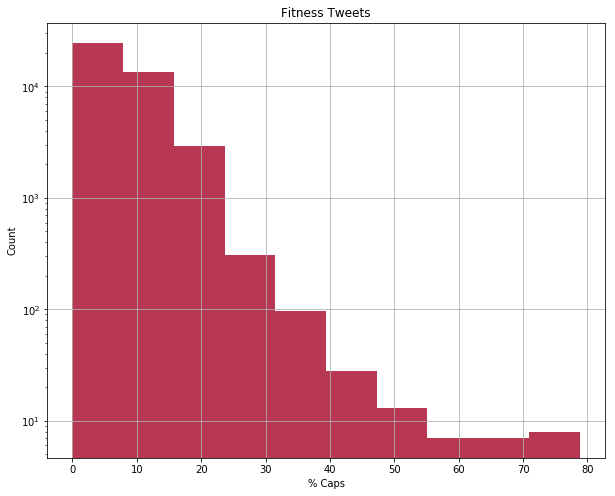

In [210]:
# Distribution of % caps
plt.figure(figsize=(18, 6))

fitness_df['% caps'].hist(color='#A60628', alpha=0.8, figsize=(10,8))
plt.yscale('log', nonposy='clip')
plt.title('Fitness Tweets')
plt.xlabel('% Caps')
plt.ylabel('Count')
plt.show()

In [120]:
# Distributions of % caps (> 20%) in different labels

fitness_df['manycaps'] = fitness_df['% caps'].apply(lambda x: x > 20)
fitness_df.head(2)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label,tweet_length,% caps,manycaps
0,anusualauthor,official tweet of Enigma Anu Aggarwal,"Mumbai, India",544,3743,2661,2010-04-30 12:38:54,2020-10-05 15:34:17,0,You get to know your #true #nature in that mom...,"{#anuaggarwalfoundation, #mentalhealth, #bloom...",15,1,0,36,2.105263,False
7,IHealthtou,Welcome to I Health 2 U store!,United States,1,45,3205,2019-12-15 18:16:24,2020-10-05 15:33:33,0,13.58I Health 2 U#inspiration #wellness 310 ml...,{#wellness},1,1,0,15,11.111111,False


In [137]:
manycaps_fitness = fitness_df[['label', 'manycaps']].groupby('label').mean()
manycaps_fitness

,manycaps
label,
0,0.022223
1,0.007762


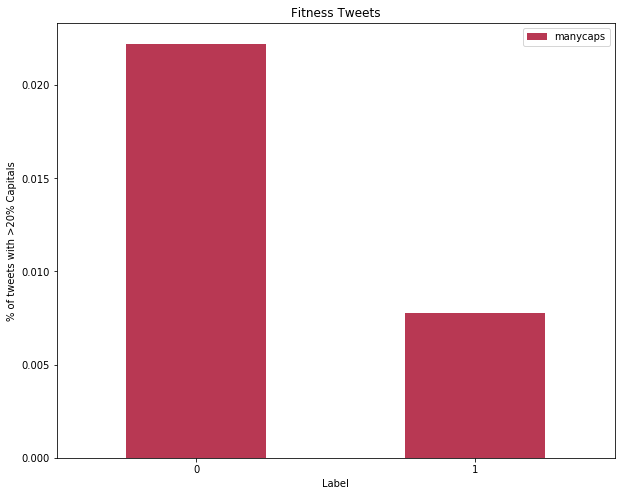

In [203]:
manycaps_fitness = fitness_df[['label', 'manycaps']].groupby('label').mean()
manycaps_fitness.plot(kind='bar', color='#A60628',rot = 0, alpha=0.8, figsize=(10,8)).set(xlabel='Label', ylabel='% of tweets with >20% Capitals', title='Fitness Tweets');

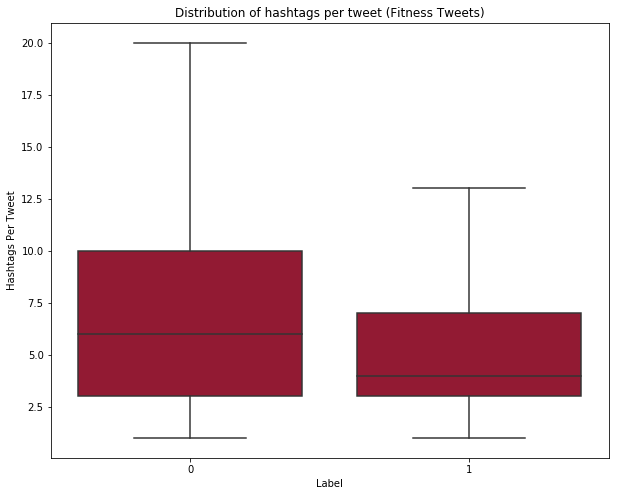

In [224]:
# Distribution of number of hashtags in different labels
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = 'num_hashtags', data = fitness_df, showfliers=False, color='#A60628').set(xlabel= 'Label',ylabel='Hashtags Per Tweet', title='Distribution of hashtags per tweet (Fitness Tweets)')
plt.show()

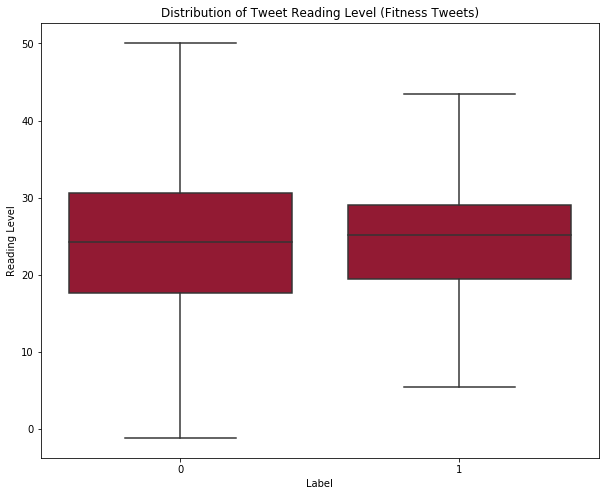

In [225]:
# Distribution of reading level in different labels (Automated Readability Index)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fitness_df['text'].apply(lambda x: textstat.automated_readability_index(x)), data = fitness_df, showfliers=False,color='#A60628').set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fitness Tweets)')
plt.show()

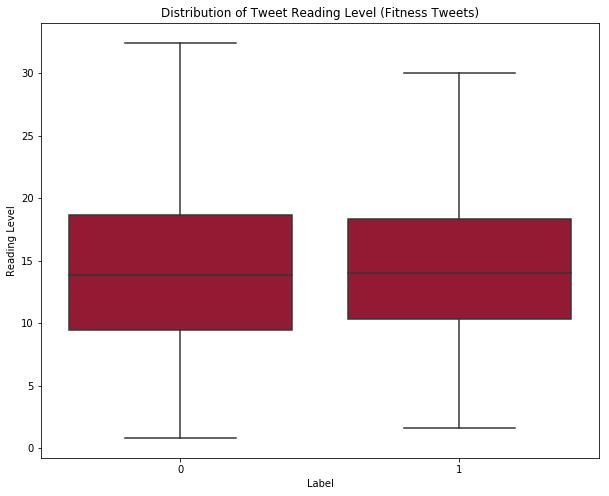

In [226]:
# Distribution of reading level in different labels (Fog Scale)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fitness_df['text'].apply(lambda x: textstat.gunning_fog(x)), data = fitness_df, showfliers=False, color='#A60628').set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fitness Tweets)')
plt.show()

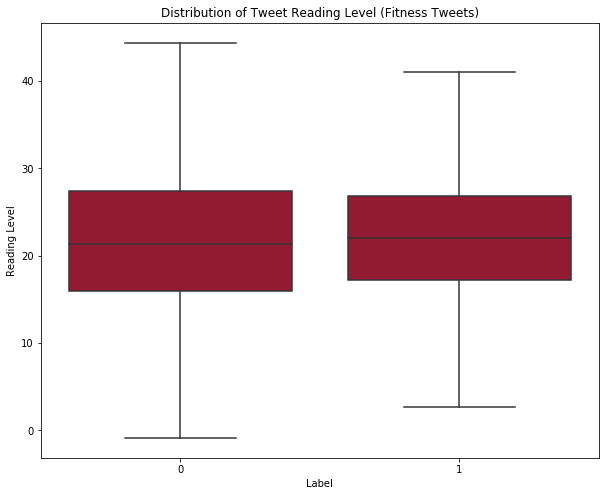

In [227]:
# Distribution of reading level in different labels (Coleman-Liau Index)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = fitness_df['text'].apply(lambda x: textstat.coleman_liau_index(x)), data = fitness_df, showfliers=False, color='#A60628').set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Fitness Tweets)')
plt.show()

In [132]:
# import NLP packages
import re
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Preprocessed text (without lemmatization) before the findinding the most predictive words
def text_preprocessing(text):
    text = re.sub(r'http\S+', '', text)   # removing URL
    text = re.sub(r'@(\w+)','',text, flags = re.MULTILINE) # remove mentions
    text = re.sub('[^a-zA-Z#]', ' ', text) # keep only alpha (removing numbers, punctions and special characters)
    text = str(text).lower()              # Lowercase all text
    text = [w for w in text.split() if w not in stop_words] # Removing Stopwords
    text = ' '.join(text)
    return text

fitness_df["clean_tweet"] = fitness_df['text'].apply(text_preprocessing)
fitness_df.head(2)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label,tweet_length,% caps,manycaps,clean_tweet
0,anusualauthor,official tweet of Enigma Anu Aggarwal,"Mumbai, India",544,3743,2661,2010-04-30 12:38:54,2020-10-05 15:34:17,0,You get to know your #true #nature in that mom...,"{#anuaggarwalfoundation, #mentalhealth, #bloom...",15,1,0,36,2.105263,False,get know #true #nature moment #bloom like flow...
7,IHealthtou,Welcome to I Health 2 U store!,United States,1,45,3205,2019-12-15 18:16:24,2020-10-05 15:33:33,0,13.58I Health 2 U#inspiration #wellness 310 ml...,{#wellness},1,1,0,15,11.111111,False,health u#inspiration #wellness ml large rectal...


In [177]:
# make a pickled file to store the preprocessed tweets (without lemmatization)
pd.to_pickle(fitness_df, 'fitness_preprocessed.pkl')

## Travel Tweets

In [139]:
# Load fitness tweets into a pandas DataFrame
travel_df = pd.read_csv('travel_tweets.csv')
travel_df.head()

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text
0,kthjkuwu,˗ˏˋ I love you MORE than yesterday and LESS th...,NaN,1160,302,21909,2015-05-23 17:04:00,2020-10-06 15:21:27,9223,RT @RBW_MAMAMOO: [#마마무]\n\nMAMAMOO 10th\nMini ...
1,nayeon1727228,Twice💖💖,NaN,130,5,1709,2020-06-21 16:28:11,2020-10-06 15:21:27,9223,RT @RBW_MAMAMOO: [#마마무]\n\nMAMAMOO 10th\nMini ...
2,seoulbyjoon_,𝑺𝒕𝒓𝒆𝒂𝒎 𝑫𝒀𝑵𝒂𝒎𝒊𝑻𝑬💿📼 𝑺𝒕𝒓𝒆𝒂𝒎 𝑾𝒂𝒏𝒏𝒂 𝑩𝒆 𝑴𝒚𝒔𝒆𝒍𝒇 💗💚💙💜...,s/h•15•🇲🇽•CA,474,276,9005,2018-12-04 01:11:37,2020-10-06 15:21:27,9223,RT @RBW_MAMAMOO: [#마마무]\n\nMAMAMOO 10th\nMini ...
3,wheemoonve,moomoo-tomoon-weve fan account | she/her.,01l | broken eng/ina,477,429,16205,2020-07-31 11:58:21,2020-10-06 15:21:26,0,chop chop mumu time to diligently collect star...
4,namchildz,⠀ ⠀⠀ 𝐃-𝟐⠀‎—⠀𝘁𝗿𝗮𝗰𝗸 𝟯⠀:⠀𝗴𝗼 𝗳𝘂𝗰𝗸 𝘆𝗼𝘂𝗿𝘀𝗲𝗹𝗳 ...,only army,1933,2855,176342,2014-03-07 17:11:01,2020-10-06 15:21:26,9223,RT @RBW_MAMAMOO: [#마마무]\n\nMAMAMOO 10th\nMini ...


In [140]:
# Find out total no of rows and columns
travel_df.shape

(95980, 10)

In [141]:
# Count missing values
travel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95980 entries, 0 to 95979
Data columns (total 10 columns):
user_name          95980 non-null object
user_desc          86417 non-null object
location           64883 non-null object
following          95980 non-null int64
followers          95980 non-null int64
totaltweets        95980 non-null int64
user_createdts     95980 non-null object
tweet_createdts    95980 non-null object
retweet_count      95980 non-null int64
text               95980 non-null object
dtypes: int64(4), object(6)
memory usage: 7.3+ MB


In [142]:
# Check for duplicate tweets 
duplicate_tweets_travel = travel_df.duplicated(keep='first').sum()
duplicate_tweets_travel

4182

In [143]:
# drop duplicates
travel_df = travel_df.drop_duplicates()
len(travel_df)

91798

In [144]:
# Check for % of retweets
travel_df['text'].apply(lambda x: 'RT' in x[:3]).mean()

0.6845791847316935

In [145]:
# Drop the retweets
travel_df = travel_df[~travel_df.text.str.startswith('RT')]
len(travel_df)

28970

In [146]:
# defind a function to find all the hashtags in a tweet

def hashtag(text):
    return (set([str(i.lower()) for i in text.split() if i.startswith("#")]))

travel_df['hashtags'] = travel_df['text'].apply(hashtag)
travel_df.head(3)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags
3,wheemoonve,moomoo-tomoon-weve fan account | she/her.,01l | broken eng/ina,477,429,16205,2020-07-31 11:58:21,2020-10-06 15:21:26,0,chop chop mumu time to diligently collect star...,"{#mamamoo, #mamamooisback, #travel}"
5,ddakwhee,"fan account for MAMAMOO~\nmoo since UOAY era, ...",NaN,154,83,1995,2020-07-17 14:39:30,2020-10-06 15:21:26,0,I THOUGHT MOOS WERE CLOWNING BUT THEORIES WERE...,"{#mamamoo, #mamamooiscoming, #travel}"
23,UAEVOICE_Eng,UAE Voice is your gate to the UAE News in part...,UAE,3757,919,3183,2019-12-06 16:24:33,2020-10-06 15:21:20,0,Amending #Travel procedures through the ports ...,"{#dubai-, #uae, #travel}"


In [147]:
# Count the hashtags per each tweets
travel_df['num_hashtags'] = travel_df['hashtags'].apply(len)
travel_df.head(3)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags
3,wheemoonve,moomoo-tomoon-weve fan account | she/her.,01l | broken eng/ina,477,429,16205,2020-07-31 11:58:21,2020-10-06 15:21:26,0,chop chop mumu time to diligently collect star...,"{#mamamoo, #mamamooisback, #travel}",3
5,ddakwhee,"fan account for MAMAMOO~\nmoo since UOAY era, ...",NaN,154,83,1995,2020-07-17 14:39:30,2020-10-06 15:21:26,0,I THOUGHT MOOS WERE CLOWNING BUT THEORIES WERE...,"{#mamamoo, #mamamooiscoming, #travel}",3
23,UAEVOICE_Eng,UAE Voice is your gate to the UAE News in part...,UAE,3757,919,3183,2019-12-06 16:24:33,2020-10-06 15:21:20,0,Amending #Travel procedures through the ports ...,"{#dubai-, #uae, #travel}",3


In [148]:
# find the number of search hashtags (we used thsese tags to pull the tweet) in a tweet
search_tags_travel = ['#travel', '#traveltips', '#trip', '#travelskills', '#travelblog', '#travelling', '#travellingtheworld', '#vacation', '#travelphotography', '#holidays', '#tour', '#traveler', '#travelgram', '#travelbloggers', '#travelblogging', '#tourism', '#budgettravel']

def search_hashtags(tags):
    t = 0
    for i in search_tags_travel:
        for j in tags:
            if i in j:
                t += 1
    return t

                
travel_df['num_search_tags'] = travel_df['hashtags'].apply(search_hashtags)
travel_df.head()        

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags
3,wheemoonve,moomoo-tomoon-weve fan account | she/her.,01l | broken eng/ina,477,429,16205,2020-07-31 11:58:21,2020-10-06 15:21:26,0,chop chop mumu time to diligently collect star...,"{#mamamoo, #mamamooisback, #travel}",3,1
5,ddakwhee,"fan account for MAMAMOO~\nmoo since UOAY era, ...",NaN,154,83,1995,2020-07-17 14:39:30,2020-10-06 15:21:26,0,I THOUGHT MOOS WERE CLOWNING BUT THEORIES WERE...,"{#mamamoo, #mamamooiscoming, #travel}",3,1
23,UAEVOICE_Eng,UAE Voice is your gate to the UAE News in part...,UAE,3757,919,3183,2019-12-06 16:24:33,2020-10-06 15:21:20,0,Amending #Travel procedures through the ports ...,"{#dubai-, #uae, #travel}",3,1
49,Inselheld,Jeden Tag 1 Bild von den schönsten Inseln: Amr...,"Balearen, Spanien",115,108,625,2016-10-19 14:11:51,2020-10-06 15:21:12,0,#Trekking near #SpiaggiaStrangolato on #LaMadd...,"{#travel, #sun, #sardegnagram, #beach, #sardin...",24,1
75,short_moomoo,ot4 or nothing\n\nfan account\n\n(she/her),NaN,222,190,7955,2013-12-07 20:02:20,2020-10-06 15:21:03,0,i was about to go back asleep but then suddenl...,"{#mamamoo, #mamamooiscoming, #travel, #마마무}",4,1


In [149]:
# find the the number of tweets with no search hashtags
len(travel_df[travel_df.num_search_tags == 0])

103

In [150]:
# drop the tweets with no search hashtags
travel_df = travel_df[travel_df.num_search_tags != 0]
len(travel_df)

28867

In [151]:
# Remove tweets between 5000 and 30,000 followers
travel_df = travel_df[(travel_df.followers <= 5000) | (travel_df.followers > 30000)]
len(travel_df)

23983

In [152]:
# define a function to label the tweets based on the number of followers the user have
def label_func(followers):
    if followers > 30000:
        return 1
    else:
        return 0

travel_df['label'] = travel_df['followers'].apply(label_func)
travel_df.head()

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label
3,wheemoonve,moomoo-tomoon-weve fan account | she/her.,01l | broken eng/ina,477,429,16205,2020-07-31 11:58:21,2020-10-06 15:21:26,0,chop chop mumu time to diligently collect star...,"{#mamamoo, #mamamooisback, #travel}",3,1,0
5,ddakwhee,"fan account for MAMAMOO~\nmoo since UOAY era, ...",NaN,154,83,1995,2020-07-17 14:39:30,2020-10-06 15:21:26,0,I THOUGHT MOOS WERE CLOWNING BUT THEORIES WERE...,"{#mamamoo, #mamamooiscoming, #travel}",3,1,0
23,UAEVOICE_Eng,UAE Voice is your gate to the UAE News in part...,UAE,3757,919,3183,2019-12-06 16:24:33,2020-10-06 15:21:20,0,Amending #Travel procedures through the ports ...,"{#dubai-, #uae, #travel}",3,1,0
49,Inselheld,Jeden Tag 1 Bild von den schönsten Inseln: Amr...,"Balearen, Spanien",115,108,625,2016-10-19 14:11:51,2020-10-06 15:21:12,0,#Trekking near #SpiaggiaStrangolato on #LaMadd...,"{#travel, #sun, #sardegnagram, #beach, #sardin...",24,1,0
75,short_moomoo,ot4 or nothing\n\nfan account\n\n(she/her),NaN,222,190,7955,2013-12-07 20:02:20,2020-10-06 15:21:03,0,i was about to go back asleep but then suddenl...,"{#mamamoo, #mamamooiscoming, #travel, #마마무}",4,1,0


In [154]:
# counts the number of tweets in each label
followers_count_travel = travel_df['label'].value_counts().sort_index()
followers_count_travel

0    21776
1     2207
Name: label, dtype: int64

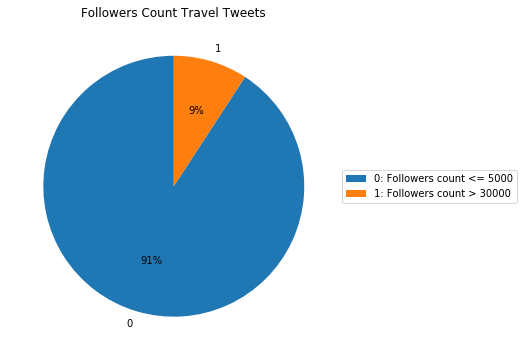

In [155]:
# Pie plot to show the percentage of tweets in each label
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
plt.pie(followers_count_travel, labels=[0,1],startangle=90, autopct='%.0f%%')

ax.legend(["0: Followers count <= 5000", "1: Followers count > 30000"], loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Followers Count Travel Tweets")

plt.show()

### Distribution of Word Count, % of caps, number of hashtags in different labels (followers count category)


In [156]:
# Distribution of tweet length in different labels (followers category)

travel_df['tweet_length'] = travel_df['text'].apply(lambda x: len(x.split())) # tweet length
travel_df.head(2)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label,tweet_length
3,wheemoonve,moomoo-tomoon-weve fan account | she/her.,01l | broken eng/ina,477,429,16205,2020-07-31 11:58:21,2020-10-06 15:21:26,0,chop chop mumu time to diligently collect star...,"{#mamamoo, #mamamooisback, #travel}",3,1,0,29
5,ddakwhee,"fan account for MAMAMOO~\nmoo since UOAY era, ...",NaN,154,83,1995,2020-07-17 14:39:30,2020-10-06 15:21:26,0,I THOUGHT MOOS WERE CLOWNING BUT THEORIES WERE...,"{#mamamoo, #mamamooiscoming, #travel}",3,1,0,15


In [157]:
# user with higest number of tweets on travel
user = travel_df['user_name'].value_counts()
user.head(10)

FBMyNEXTCar        847
ToiletGuru         307
promovisionpv      290
CNN_newstrend      202
JustinLaurenXO     192
bcgoodsintl        159
SecretFlying       151
chinmoylad         136
bmurphypointman    129
boracayisland1     117
Name: user_name, dtype: int64

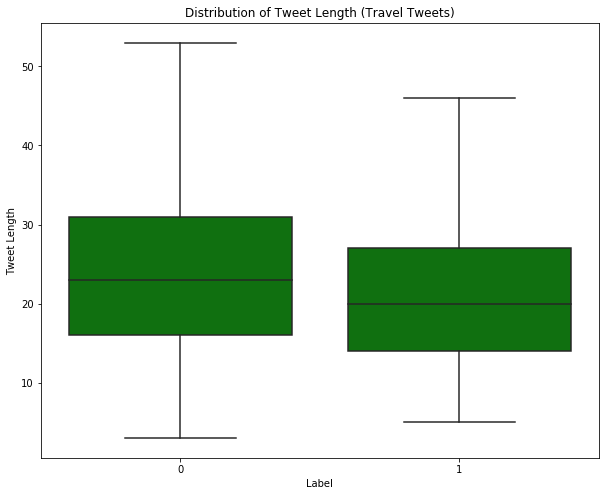

In [199]:
# tweet length distribution at different labels
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = 'tweet_length', data = travel_df, showfliers=False,color='green').set(xlabel= 'Label', ylabel='Tweet Length', title='Distribution of Tweet Length (Travel Tweets)')
plt.show()

In [159]:
# define a function to get % of caps in a tweet
def caps(text):
    return np.mean([1 if i.isupper() else 0 for i in text]) * 100

travel_df['% caps'] = travel_df['text'].apply(caps)
travel_df.head(2)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label,tweet_length,% caps
3,wheemoonve,moomoo-tomoon-weve fan account | she/her.,01l | broken eng/ina,477,429,16205,2020-07-31 11:58:21,2020-10-06 15:21:26,0,chop chop mumu time to diligently collect star...,"{#mamamoo, #mamamooisback, #travel}",3,1,0,29,12.500000
5,ddakwhee,"fan account for MAMAMOO~\nmoo since UOAY era, ...",NaN,154,83,1995,2020-07-17 14:39:30,2020-10-06 15:21:26,0,I THOUGHT MOOS WERE CLOWNING BUT THEORIES WERE...,"{#mamamoo, #mamamooiscoming, #travel}",3,1,0,15,63.779528


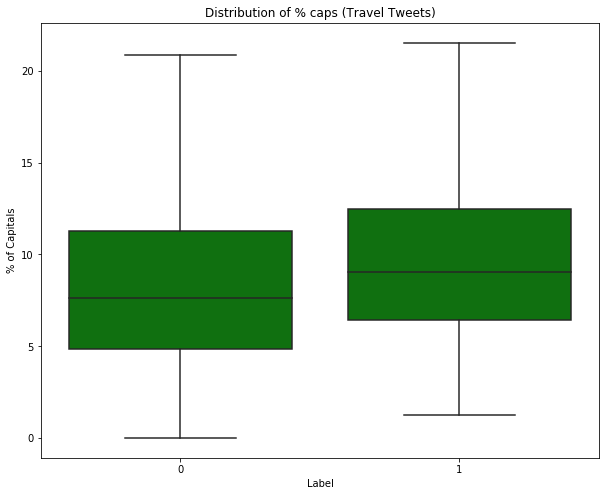

In [190]:
# Distribution of % of Caps in different followers count (labels)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = travel_df['% caps'], data = travel_df, showfliers=False, color='green').set(xlabel= 'Label',ylabel='% of Capitals', title='Distribution of % caps (Travel Tweets)')
plt.show()

In [161]:
travel_df[['label', '% caps']].groupby('label').mean()

,% caps
label,
0,9.254603
1,9.539909


Text(0, 0.5, 'Count')

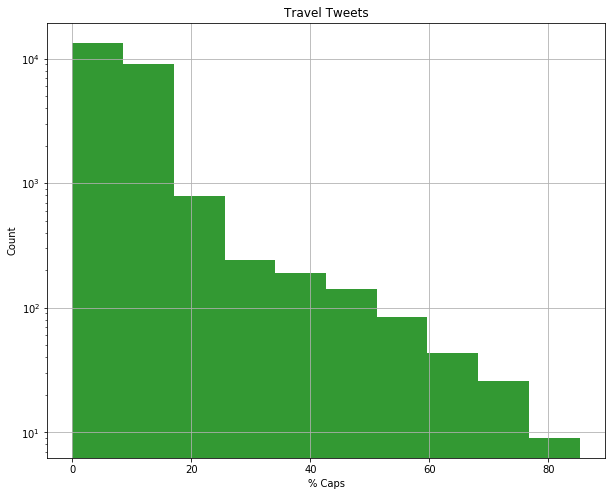

In [198]:
# Distribution of % caps
plt.figure(figsize=(10,8))

travel_df['% caps'].hist(color='green', alpha=0.8)
plt.yscale('log', nonposy='clip')
plt.title('Travel Tweets')
plt.xlabel('% Caps')
plt.ylabel('Count')

In [163]:
# Distributions of % caps (> 20%) in different labels

travel_df['manycaps'] = travel_df['% caps'].apply(lambda x: x > 20)
travel_df.head(2)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label,tweet_length,% caps,manycaps
3,wheemoonve,moomoo-tomoon-weve fan account | she/her.,01l | broken eng/ina,477,429,16205,2020-07-31 11:58:21,2020-10-06 15:21:26,0,chop chop mumu time to diligently collect star...,"{#mamamoo, #mamamooisback, #travel}",3,1,0,29,12.500000,False
5,ddakwhee,"fan account for MAMAMOO~\nmoo since UOAY era, ...",NaN,154,83,1995,2020-07-17 14:39:30,2020-10-06 15:21:26,0,I THOUGHT MOOS WERE CLOWNING BUT THEORIES WERE...,"{#mamamoo, #mamamooiscoming, #travel}",3,1,0,15,63.779528,True


In [165]:
manycaps_travel = travel_df[['label', 'manycaps']].groupby('label').mean()
manycaps_travel

,manycaps
label,
0,0.047300
1,0.008609


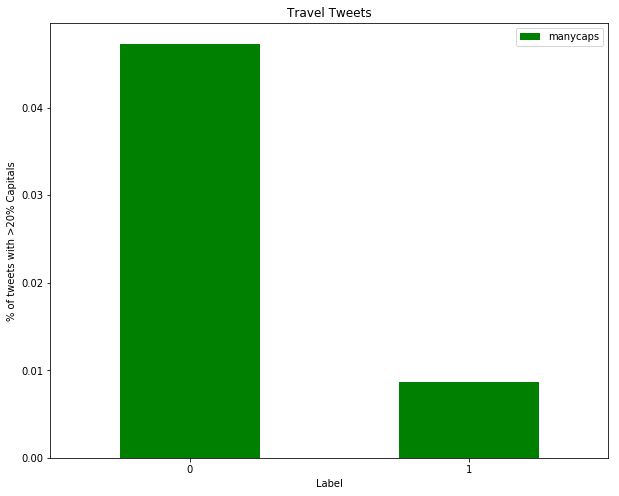

In [195]:
manycaps_travel.plot(kind='bar', color='green',rot = 0, figsize=(10, 8)).set(xlabel='Label', ylabel='% of tweets with >20% Capitals', title='Travel Tweets');

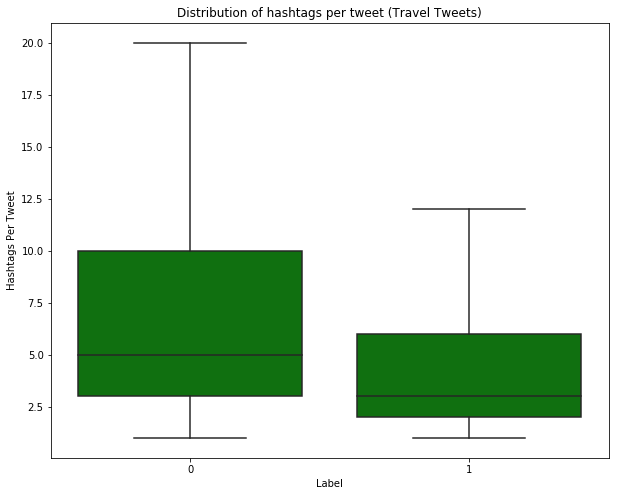

In [196]:
# Distribution of number of hashtags in different labels
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = 'num_hashtags', data = travel_df, showfliers=False, color='green').set(xlabel= 'Label',ylabel='Hashtags Per Tweet', title='Distribution of hashtags per tweet (Travel Tweets)')
plt.show()

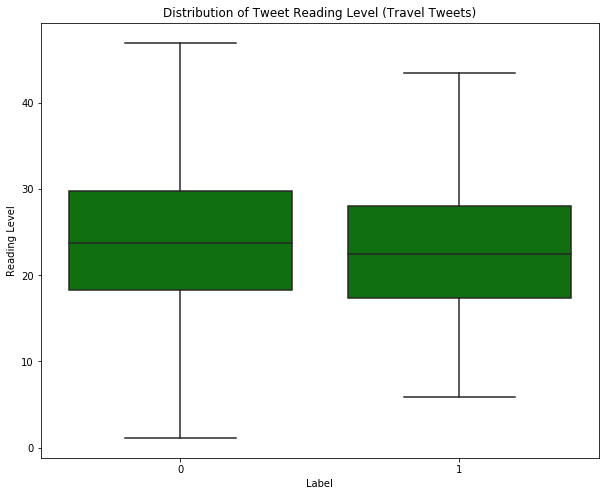

In [197]:
# Distribution of reading level in different labels (Automated Readability Index)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = travel_df['text'].apply(lambda x: textstat.automated_readability_index(x)), data = travel_df, showfliers=False, color='green').set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Travel Tweets)')
plt.show()

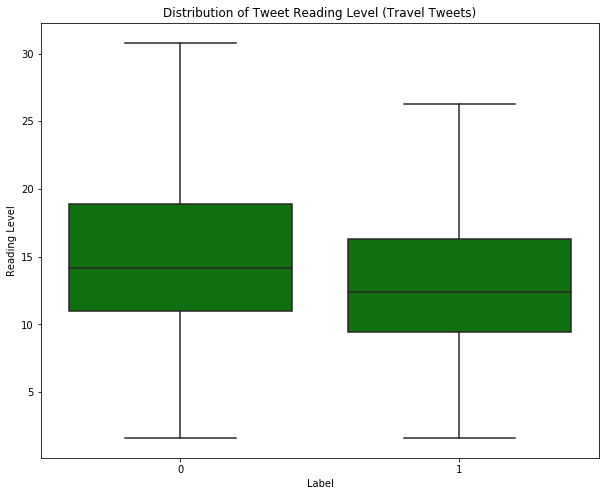

In [200]:
# Distribution of reading level in different labels (Fog Scale)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = travel_df['text'].apply(lambda x: textstat.gunning_fog(x)), data = travel_df, showfliers=False, color='green').set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Travel Tweets)')
plt.show()

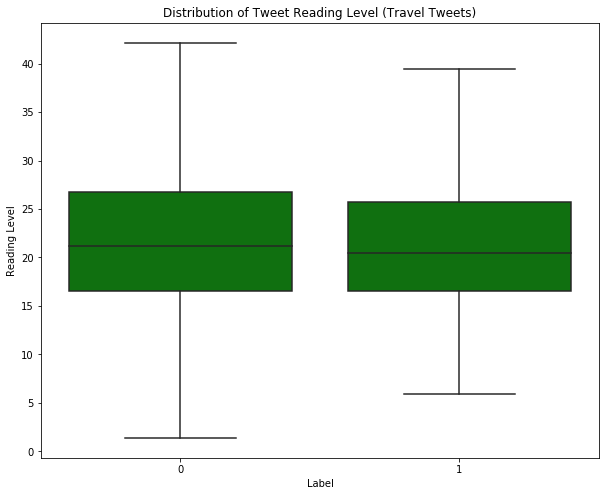

In [201]:
# Distribution of reading level in different labels (Coleman-Liau Index)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = travel_df['text'].apply(lambda x: textstat.coleman_liau_index(x)), data = travel_df, showfliers=False, color='green').set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Travel Tweets)')
plt.show()

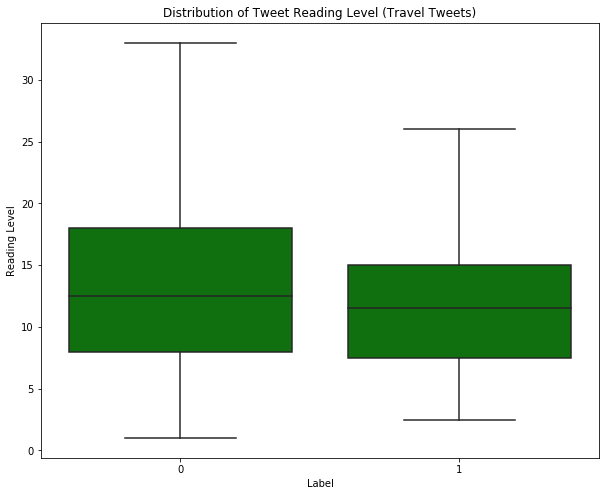

In [202]:
# Distribution of reading level in different labels (Linsear Write Formula)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'label', y = travel_df['text'].apply(lambda x: textstat.linsear_write_formula(x)), data = travel_df, showfliers=False, color='green').set(xlabel= 'Label',ylabel='Reading Level', title='Distribution of Tweet Reading Level (Travel Tweets)')
plt.show()

### Tweet Pre-Processing

In [176]:
# import NLP packages
import re
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Preprocessed text (without lemmatization) before the findinding the most predictive words
def text_preprocessing(text):
    text = re.sub(r'http\S+', '', text)   # removing URL
    text = re.sub(r'@(\w+)','',text, flags = re.MULTILINE) # remove mentions
    text = re.sub('[^a-zA-Z#]', ' ', text) # keep only alpha (removing numbers, punctions and special characters)
    text = str(text).lower()              # Lowercase all text
    text = [w for w in text.split() if w not in stop_words] # Removing Stopwords
    text = ' '.join(text)
    return text

travel_df["clean_tweet"] = travel_df['text'].apply(text_preprocessing)
travel_df.head(2)

,user_name,user_desc,location,following,followers,totaltweets,user_createdts,tweet_createdts,retweet_count,text,hashtags,num_hashtags,num_search_tags,label,tweet_length,% caps,manycaps,clean_tweet
3,wheemoonve,moomoo-tomoon-weve fan account | she/her.,01l | broken eng/ina,477,429,16205,2020-07-31 11:58:21,2020-10-06 15:21:26,0,chop chop mumu time to diligently collect star...,"{#mamamoo, #mamamooisback, #travel}",3,1,0,29,12.500000,False,chop chop mumu time diligently collect stars h...
5,ddakwhee,"fan account for MAMAMOO~\nmoo since UOAY era, ...",NaN,154,83,1995,2020-07-17 14:39:30,2020-10-06 15:21:26,0,I THOUGHT MOOS WERE CLOWNING BUT THEORIES WERE...,"{#mamamoo, #mamamooiscoming, #travel}",3,1,0,15,63.779528,True,thought moos clowning theories right #travel #...


In [178]:
# make a pickled file to store the preprocessed tweets (without lemmatization)
pd.to_pickle(travel_df, 'travel_preprocessed.pkl')

In [ ]:
#Preprocessing

# import NLP packages
import re
import nltk
from wordcloud import WordCloud

from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Preprocessing
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

def text_preprocessing(text):
    text = re.sub(r'http\S+', '', text)   # removing URL
    text = re.sub(r'@(\w+)','',text, flags = re.MULTILINE) # remove mentions
    text = re.sub(r'#(\w+)','',text, flags = re.MULTILINE) # remove hashtags
    text = re.sub('[^a-zA-Z]', ' ', text) # keep only alpha (removing numbers, punctions and special characters)
    text = str(text).lower()              # Lowercase all text
    text = word_tokenize(text)            # Tokenization
    text = [w for w in text if w not in stop_words] # Removing Stopwords
    text = [lemma.lemmatize(word=w, pos='v') for w in text] # Lemmatization
    text = ' '.join(text)
    return text
fashion_df['clean_text'] = fashion_df['text'].apply(text_preprocessing) # baby_products preprocessiing
fashion_df.head(2)